# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Definition of random number generation and limits

In [3]:
# Parameters of the Gamma distribution

mean = 10
sigma = np.sqrt(10.)

k = (mean/sigma)**2

lam = sigma**2/mean

# Considered limits

limlow = np.array([mean-sigma, mean-2*sigma,mean-3*sigma,mean-4*sigma,mean-5*sigma])
limhig = np.array([mean+sigma, mean+2*sigma,mean+3*sigma,mean+4*sigma,mean+5*sigma])

# Number generation procedure

def myrnd(N=1):
    
    rvec = np.random.gamma(k,scale=lam,size=(N))

    return rvec


### (2) Generate multiple numbers

In [4]:
Nmc = 100000000

rvec = myrnd(Nmc)

### (3)  Count limit probability

In [5]:
print("\nLower limit probability:")

for ll in limlow :
    nl = np.sum(rvec < ll)
    p = nl/Nmc
    ep = np.sqrt(p*(1-p)/Nmc)
    print (" P ( x < ",ll,") = ",p," +/- ",ep)
    
print("\nUpper limit probability:")

for ul in limhig :
    nl = np.sum(rvec > ul)
    p = nl/Nmc
    ep = np.sqrt(p*(1-p)/Nmc)
    print (" P ( x > ",ul,") = ",p," +/- ",ep)
    


Lower limit probability:
 P ( x <  6.83772233983162 ) =  0.1534293  +/-  3.604008183973921e-05
 P ( x <  3.675444679663241 ) =  0.00462495  +/-  6.784953822611839e-06
 P ( x <  0.5131670194948619 ) =  0.0  +/-  0.0
 P ( x <  -2.649110640673518 ) =  0.0  +/-  0.0
 P ( x <  -5.811388300841898 ) =  0.0  +/-  0.0

Upper limit probability:
 P ( x >  13.16227766016838 ) =  0.1553569  +/-  3.6224457707795985e-05
 P ( x >  16.32455532033676 ) =  0.03684263  +/-  1.8837529194319275e-05
 P ( x >  19.486832980505138 ) =  0.00671565  +/-  8.167343536963228e-06
 P ( x >  22.64911064067352 ) =  0.00100041  +/-  3.161343353436795e-06
 P ( x >  25.811388300841898 ) =  0.00012857  +/-  1.1338142253257366e-06


### (4) Plot distribution histogram

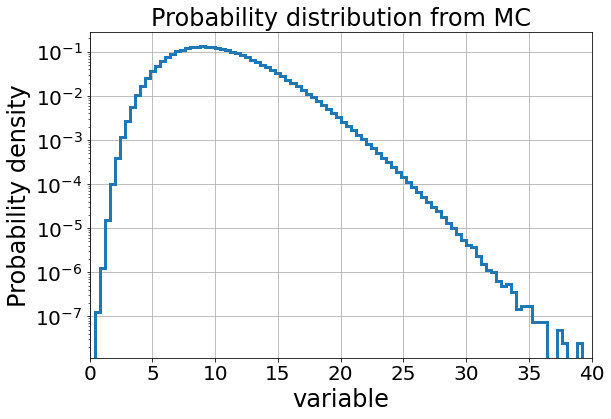

In [6]:
# Range for result histogram

Xmax=40.
Nbin = 100

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(rvec,bins=Nbin, range=[0.,Xmax], density=True, log=True, histtype='step',linewidth=3)

plt.title("Probability distribution from MC",size=24)
plt.xlabel('variable',size=24)
plt.ylabel('Probability density',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0.,Xmax])
plt.grid(which='major', axis='both')

fname = '06_interval_3.png'
plt.savefig(fname)

plt.show()